In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
#to viualize the instance of it all u need to do is grab an instance's feature vector, convert it to 28*28 arry and plot using plt.

In [7]:
some_digit = X.iloc[0]
some_digit = some_digit.to_numpy()

In [8]:
some_digit_image = some_digit.reshape(28, 28)

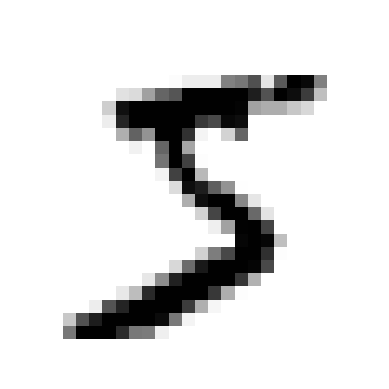

In [9]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [10]:
y[0]                   # so its a five

'5'

In [11]:
import numpy as np

In [12]:
y = y.astype(np.uint8)           # beacause the label is string and most ml algo prefer num

In [13]:
#splitting the mnist as it is already split dataset

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
#TRAINING A BINARY CLASSIFIER               buy simplifiying the problem to classifiy only the digit 5

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

/home/FYZ/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [21]:
#PERFORMANCE MEASURES

In [22]:
#measuring the accuracy using Cross-Validation

In [23]:
#cross-validation_from scratch

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [25]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))    

0.9669
0.91625
0.96785


In [26]:
from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [27]:
from sklearn.base import BaseEstimator

In [28]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [29]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")   # it gave 90% accuray even thou it is dumer classifer who learned nothing ...

array([0.91125, 0.90855, 0.90915])

In [30]:
# the point is that this is the reason the accuracy is generally avoided.

In [31]:
#Term to remember: skewed datasets (i.e., when some classes are much more frequent than others).

In [32]:
#CONFUSION MATRIX

In [33]:
from sklearn.model_selection import cross_val_predict  #like the cross_val_score() function, cross_val_predict() performs K-fold
# cross-validation, but instead of returning the evaluation scores, it returns the predic‐
# tions made on each test fold

In [34]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [37]:
from sklearn.metrics import precision_score, recall_score

In [38]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [39]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [40]:
from sklearn.metrics import f1_score

In [41]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [42]:
# PRECISION AND RECALL TRADEOFF

In [43]:
y_scores = sgd_clf.decision_function([some_digit])

/home/FYZ/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [44]:
y_scores

array([2164.22030239])

In [45]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [47]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

In [48]:
from sklearn.metrics import precision_recall_curve

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [50]:
def plot_precision_vs_recall_curve(precisions, recalls, thresholds, highlight_threshold):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    if highlight_threshold is not None:
        plt.axvline(highlight_threshold, color='red', linestyle='--', label=f'Threshold = {highlight_threshold:.2f}')

    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision and Recall vs Threshold")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

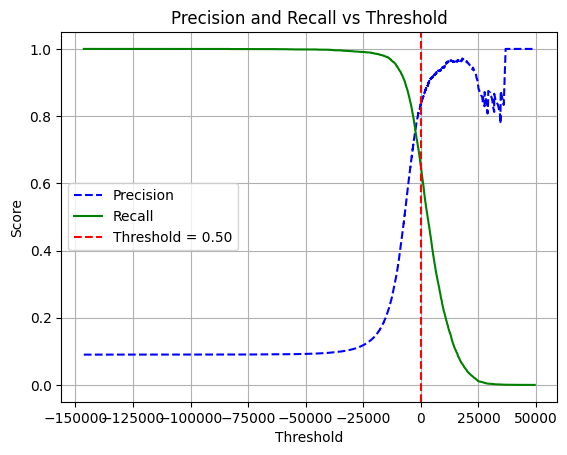

In [51]:
plot_precision_vs_recall_curve(precisions, recalls, thresholds, highlight_threshold=0.5)

In [52]:
#trying to get 90% precision for the threshold

In [53]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991439557)

In [54]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False], shape=(60000,))

In [55]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [56]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [57]:
#THE ROC CURVE

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

In [60]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

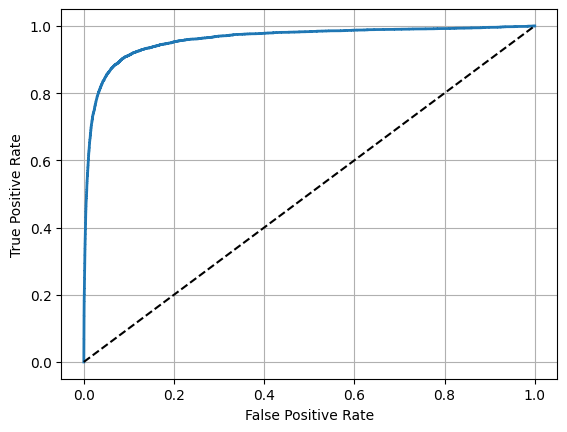

In [61]:
plot_roc_curve(fpr, tpr)
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [64]:
#trying it on RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method="predict_proba")

In [66]:
y_scores_forest = y_probas_forest[:, 1]

In [67]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

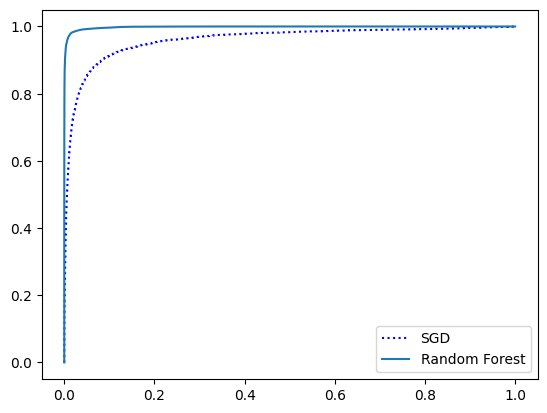

In [69]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
#plt.axvline(thresholds_forest, color="red", linestyle="--")
plt.show()

In [70]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [71]:
from sklearn.svm import SVC

In [72]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [73]:
svm_clf.predict([some_digit])

/home/FYZ/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [76]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/home/FYZ/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [78]:
np.argmax(some_digit_scores)

np.int64(5)

In [79]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [80]:
svm_clf.classes_[5]

np.uint8(5)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])